In [137]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

trollers = pd.read_csv("C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trawlers.csv", header="infer", sep=",",low_memory=False)

#Nos quedamos solo con las columnas que estan clasificadas 100% como pescando, o no pescando. Que no haya duda.
df = trollers.copy()
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')
trollers = df.copy()
#print(trollers)

In [138]:
#Dropeamos NA.
df = df.dropna()
#Generamos Feature Engeniering.

#Nos quedamos con los puntos mayores a 3 millas nauticas.
df = df[(df['distance_from_shore'] >= 5556)]
#print(len(df))
#Dropeamos columnas que no interesane en el modelo.
df = df.drop(['mmsi', 'source'], axis = 1)

#Hacemos un undersampling.
#df['date'] = pd.to_datetime(df['timestamp'],unit='s')
#df.set_index('date', inplace=True)
#df = df.resample('5Min').first().dropna(how='all').reset_index(drop=True)

#df = df.resample('5Min').first().dropna(how='all')
#print (df)


#print(df)

trollers = df.copy()
print(trollers.count)

<bound method DataFrame.count of             timestamp  distance_from_shore  distance_from_port  speed  \
242      1.325682e+09        826520.687500       855189.500000    0.0   
784      1.327070e+09        826520.687500       855189.500000    0.0   
1117     1.327374e+09        668776.562500       676221.500000    0.0   
1647     1.327875e+09        826520.687500       855189.500000    0.0   
1767     1.327994e+09          5999.852539         8062.060059    7.9   
...               ...                  ...                 ...    ...   
4369096  1.480031e+09        172998.640625       239263.859375   11.2   
4369097  1.480031e+09        173595.859375       240246.062500   11.7   
4369098  1.480031e+09        174995.703125       241416.937500   11.2   
4369099  1.480031e+09        174995.703125       241416.937500   11.5   
4369100  1.480031e+09        175597.515625       242398.671875   11.0   

             course        lat         lon is_fishing  
242       33.000000 -13.951197    

In [139]:
#Generamos train y test.
dataset = trollers
df = dataset
X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

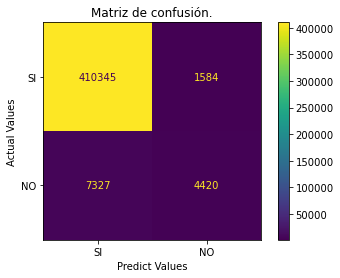

Precision: 0.736
Recall: 0.376
Accuracy: 0.979
F1 Score: 0.498


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    cm = confusion_matrix(y_test, dt.predict(X_test))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['SI', 'NO'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    ## Finally, call the matplotlib show() function to display the visualization
    ## of the Confusion Matrix.
    plt.show()

    print('Precision: %.3f' % precision_score(y_test, y_pred,pos_label='SI'))
    print('Recall: %.3f' % recall_score(y_test, y_pred, pos_label='SI'))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred, pos_label='SI'))

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_model(y_test, y_pred)


In [144]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#extra_tree_classifier = ExtraTreeClassifier(random_state=1)
#extra_tree_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

grid = GridSearchCV(ExtraTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=3,
                    param_grid =parameters
                    )

grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


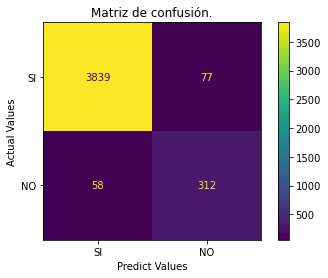

Precision: 0.802
Recall: 0.843
Accuracy: 0.969
F1 Score: 0.822


In [126]:
dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], 
                            max_features=grid.best_params_['max_features'],
                            max_leaf_nodes=grid.best_params_['max_leaf_nodes'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_weight_fraction_leaf=grid.best_params_['min_weight_fraction_leaf'],
                            splitter=grid.best_params_['splitter']
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_model(y_test, y_pred)


In [ ]:
'''
import ephem
import math
import datetime

sun = ephem.Sun()
observer = ephem.Observer()
# ↓ Define your coordinates here ↓
observer.lat, observer.lon, observer.elevation = '48.730302', '9.149483', 400
# ↓ Set the time (UTC) here ↓
observer.date = datetime.datetime.utcnow()
sun.compute(observer)
current_sun_alt = sun.alt
print(current_sun_alt*180/math.pi)
'''

In [ ]:
df.dtypes

timestamp              float64
distance_from_shore    float64
distance_from_port     float64
speed                  float64
course                 float64
lat                    float64
lon                    float64
is_fishing              object
dtype: object